# 1 Preparando o Ambiente / Carregando as bibliotecas

In [2]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression

# Seed para reprodução de resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

alteração para rodar local

In [1]:
import os
path = "P:/Meu Drive/22.2/EngSoft-Juliana/trabalho/"
os.chdir(path)

In [2]:
##Montar o drive
#from google.colab import drive
#drive.mount('/content/drive')

#import os
#workdir_path = '/content/drive/My Drive/16-Mestrado/22.2/EngSoft-Juliana' #MODIFICAR!!! #Caminho para o seu workspace
#os.chdir(workdir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carregando os dados

In [3]:
#dataset = pd.read_csv("organic.2023.01.05-alternativa01-opcao02.csv", sep=',')
dataset = pd.read_csv("mlcq_new_2023.01.24-2-drop.csv", sep=',') #,keep_default_na=False)

Criando o atributo reviewer

In [4]:
reviewer = {34:'unknown', 31:'unknown', 30:'unknown', 21:'unknown', 28:'unknown', 18:'unknown', 1: 'Middle',3: 'Middle',4: 'Senior',5: 'Junior',6: 'Junior',7: 'Junior',8: 'Junior',9: 'Junior',10:'Middle',11:'Junior',12:'Middle',13:'Junior',14:'Middle',15:'Junior',16:'Junior',17:'Junior',20:'Senior',22:'Middle',23:'Junior',25:'Junior'}
func_reviewer = lambda x: reviewer[x]
dataset['reviewer'] = dataset['reviewer_id'].apply(func_reviewer) 

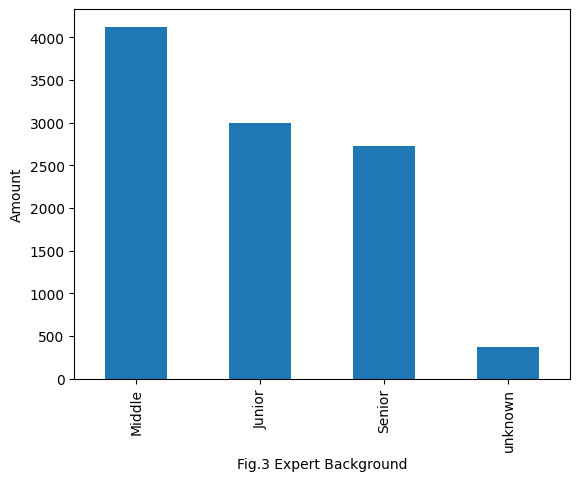

In [6]:
plt.xlabel("Fig.3 Expert Background")
plt.ylabel("Amount")
#plt.title("Code Smell")
dataset['reviewer'].value_counts().plot.bar() #;
plt.show()

In [7]:
dataset.shape

(10222, 93)

In [8]:
dataset.describe()

,reviewer_id,sample_id,start_line,end_line,lines,num_commits,NumberOfAccessedVariables,CouplingDispersion,ChangingClasses,MethodLinesOfCode,...,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty
count,10222.000000,1.022200e+04,10222.000000,10222.000000,10222.000000,10222.000000,711.000000,711.000000,702.000000,711.000000,...,5424.000000,5424.00000,5424.000000,5424.000000,5424.000000,5424.000000,5424.000000,5424.000000,5424.000000,5424.000000
mean,8.410487,6.600780e+06,2175.192819,2303.841127,129.648308,96.606241,13.122363,0.502280,0.508547,33.064698,...,18.198931,3.55955,13.156711,1.273046,0.245391,0.331121,0.138827,64.887906,51.596239,0.793879
std,7.286428,1.666441e+06,14959.011718,14960.076583,290.085206,90.275158,9.538385,0.282094,0.683459,19.289895,...,42.811515,14.83326,30.391516,1.703909,1.518852,1.192925,1.067556,81.178669,219.335112,3.593424
min,1.000000,3.698323e+06,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,5.207888e+06,34.000000,90.000000,14.000000,30.000000,7.000000,0.312500,0.000000,18.500000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,12.750000,1.000000,0.000000
50%,5.000000,6.629470e+06,67.000000,191.500000,40.000000,70.000000,12.000000,0.500000,0.000000,32.000000,...,5.000000,0.00000,3.000000,1.000000,0.000000,0.000000,0.000000,36.000000,1.000000,0.000000
75%,13.000000,7.952037e+06,244.750000,447.000000,112.000000,146.000000,17.000000,0.692308,1.000000,39.000000,...,16.000000,2.00000,12.000000,2.000000,0.000000,0.000000,0.000000,85.000000,1.000000,0.000000
max,34.000000,9.553496e+06,252554.000000,252655.000000,4111.000000,424.000000,54.000000,1.000000,4.000000,105.000000,...,558.000000,281.00000,363.000000,13.000000,40.000000,15.000000,29.000000,652.000000,1025.000000,51.000000


In [9]:
dataset.head()

,commit_hash,reviewer_id,sample_id,smell,severity,review_timestamp,type,code_name,repository,path,...,constructor,line,parametersQty,methodsInvokedQty,methodsInvokedLocalQty,methodsInvokedIndirectLocalQty,hasJavaDoc,clean_method,_merge,reviewer
0,114c412afbfba24ffb4fbc804e5308a823a16a78,6,5771277,none,none,2019-03-27 10:34:53.041496,function,org.apache.syncope.client.ui.commons.ConnIdSpe...,git@github.com:apache/syncope.git,/client/idrepo/ui/src/main/java/org/apache/syn...,...,True,35,0,0,0,0,False,ConnIdSpecialName,both,Junior
1,d5675c332497c1ac1dedefdf91e87476b5c0d7a9,6,5786929,blob,critical,2019-03-27 10:37:38.107923,class,org.apache.tez.runtime.library.common.writers....,git@github.com:apache/tez.git,/tez-runtime-library/src/main/java/org/apache/...,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,both,Junior
2,d5675c332497c1ac1dedefdf91e87476b5c0d7a9,6,5786929,data class,critical,2019-03-27 10:37:38.109068,class,org.apache.tez.runtime.library.common.writers....,git@github.com:apache/tez.git,/tez-runtime-library/src/main/java/org/apache/...,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,both,Junior
3,4131c6e30f2e0eb1feb85e0f7576531d4e830468,6,5788107,none,none,2019-03-27 10:37:49.627100,function,org.apache.tika.parser.ocr.TesseractOCRConfig#...,git@github.com:apache/tika.git,/tika-parsers/src/main/java/org/apache/tika/pa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Junior
4,d5675c332497c1ac1dedefdf91e87476b5c0d7a9,6,5788583,none,none,2019-03-27 10:38:15.588848,function,org.apache.tez.runtime.library.common.shuffle....,git@github.com:apache/tez.git,/tez-runtime-library/src/main/java/org/apache/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Junior


In [10]:
##Quantidade de NAN
for col in dataset.columns:
    cont = dataset[col].isna().sum()
    print(f'{col}: {cont} ')

commit_hash: 0 
reviewer_id: 0 
sample_id: 0 
smell: 0 
severity: 0 
review_timestamp: 0 
type: 0 
code_name: 0 
repository: 0 
path: 0 
start_line: 0 
end_line: 0 
link: 0 
relevant: 0 
lines: 0 
num_commits: 0 
reason: 9511 
NumberOfAccessedVariables: 9511 
CouplingDispersion: 9511 
ChangingClasses: 9520 
MethodLinesOfCode: 9511 
CyclomaticComplexity: 9511 
MaxNesting: 9511 
CouplingIntensity: 9511 
ParameterCount: 9511 
MaxCallChain: 9511 
ChangingMethods: 9520 
repeticoes: 9511 
arquivo_org: 9511 
ck_file: 6774 
file: 4798 
class: 4798 
type_ck: 4798 
cbo: 4798 
cboModified: 4798 
fanin: 4798 
fanout: 4798 
wmc: 4798 
dit: 4798 
noc: 4798 
rfc: 4798 
lcom: 4798 
lcom*: 4818 
tcc: 5055 
lcc: 5055 
totalMethodsQty: 4798 
staticMethodsQty: 4798 
publicMethodsQty: 4798 
privateMethodsQty: 4798 
protectedMethodsQty: 4798 
defaultMethodsQty: 4798 
visibleMethodsQty: 4798 
abstractMethodsQty: 4798 
finalMethodsQty: 4798 
synchronizedMethodsQty: 4798 
totalFieldsQty: 4798 
staticFieldsQty:

In [11]:
#print(dataset.dtypes)
for x in dataset.columns:
  print(f'{x}    :  {dataset[x].dtypes}')


commit_hash    :  object
reviewer_id    :  int64
sample_id    :  int64
smell    :  object
severity    :  object
review_timestamp    :  object
type    :  object
code_name    :  object
repository    :  object
path    :  object
start_line    :  int64
end_line    :  int64
link    :  object
relevant    :  object
lines    :  int64
num_commits    :  int64
reason    :  object
NumberOfAccessedVariables    :  float64
CouplingDispersion    :  float64
ChangingClasses    :  float64
MethodLinesOfCode    :  float64
CyclomaticComplexity    :  float64
MaxNesting    :  float64
CouplingIntensity    :  float64
ParameterCount    :  float64
MaxCallChain    :  float64
ChangingMethods    :  float64
repeticoes    :  float64
arquivo_org    :  object
ck_file    :  object
file    :  object
class    :  object
type_ck    :  object
cbo    :  float64
cboModified    :  float64
fanin    :  float64
fanout    :  float64
wmc    :  float64
dit    :  object
noc    :  object
rfc    :  float64
lcom    :  object
lcom*    :  ob

In [12]:
dataset.hasJavaDoc.unique()

array(['False', 'NONE', nan, 'True'], dtype=object)

In [13]:
sorted(dataset['severity'].unique())
dataset['severity'].value_counts()

none        6925
minor       1787
major       1130
critical     380
Name: severity, dtype: int64

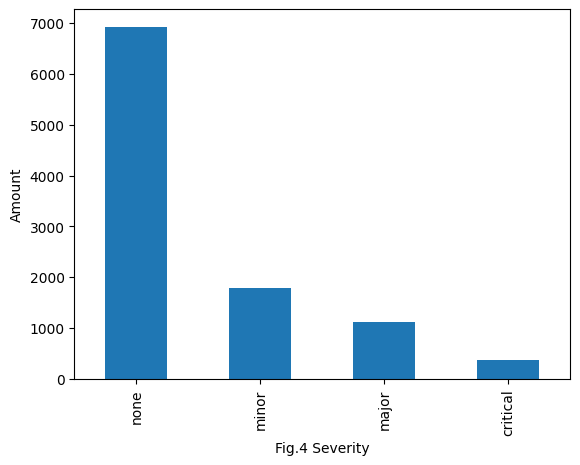

In [14]:
plt.xlabel("Fig.4 Severity")
plt.ylabel("Amount")
#plt.title("Code Smell")
dataset['severity'].value_counts().plot.bar() #;
plt.show()

In [15]:
dataset.clean_method.unique()  ## nao sera usado no modelo

array(['ConnIdSpecialName', 'NONE', nan, 'Printer', 'SSLHostConfig',
       'PerUserPoolDataSource', 'CasTreeViewer', 'UserResource',
       'DTMNodeProxy', 'UnImplNode', 'IntType', 'SystemInstance',
       'JsonGenerator', 'KerberosName', 'PackageState', 'StatusMessage',
       'SearchResultEntry', 'DomUtils', 'ProgressMonitorPresenter',
       'LifecycleModule', 'Element', 'GutterClickEvent',
       'ThreeCornerLoopLabelPositionGenerator',
       'FileBasedCredentialsService', 'UINotification', 'HttpConnection',
       'GwtSession', 'GroupServiceImpl', 'ConnectionSslOptions',
       'VersionedTextDocumentIdentifierTypeAdapter', 'DeviceServiceSteps',
       'LoggregatorMessage', 'ParserController', 'RangeDecoderFromBuffer',
       'ProductVersionExpansionRun',
       'ImmutableInMemoryMetadataRepository', 'ReadyMarker',
       'AutomationResourceBundlesTracker', 'DeviceImpl',
       'DataReferenceWrapper', 'DcatDistributionAdaptor', 'UsagesNode',
       'PhotoDataImpl', 'StringUtil', 

In [16]:
dataset.ChangingMethods.value_counts()
dataset.ChangingMethods.unique()

#dataset.repeticoes.unique()
#dataset['NumberOfAccessedVariables'].value_counts()


array([nan,  0.,  1.,  4.,  2., 10.,  3.,  8.,  7.,  6., 11., 19.,  5.])

In [16]:
# primeira analise para amostras que tem dados vindos do organic
#dataset.fillna(0, inplace = True)
#dataset = dataset.dropna()

In [17]:
dataset.shape

(10222, 93)

**Nosso rotulo terá 5 valores**

'none', 'blob', 'data class', 'long method', 'feature envy']



In [18]:
dataset.smell.value_counts()
dataset.smell.unique()

array(['none', 'blob', 'data class', 'long method', 'feature envy'],
      dtype=object)

In [19]:
##Quantidade de NAN
for col in dataset.columns:
    cont = dataset[col].isna().sum()
    print(f'{col}: {cont} ')

commit_hash: 0 
reviewer_id: 0 
sample_id: 0 
smell: 0 
severity: 0 
review_timestamp: 0 
type: 0 
code_name: 0 
repository: 0 
path: 0 
start_line: 0 
end_line: 0 
link: 0 
relevant: 0 
lines: 0 
num_commits: 0 
reason: 9511 
NumberOfAccessedVariables: 9511 
CouplingDispersion: 9511 
ChangingClasses: 9520 
MethodLinesOfCode: 9511 
CyclomaticComplexity: 9511 
MaxNesting: 9511 
CouplingIntensity: 9511 
ParameterCount: 9511 
MaxCallChain: 9511 
ChangingMethods: 9520 
repeticoes: 9511 
arquivo_org: 9511 
ck_file: 6774 
file: 4798 
class: 4798 
type_ck: 4798 
cbo: 4798 
cboModified: 4798 
fanin: 4798 
fanout: 4798 
wmc: 4798 
dit: 4798 
noc: 4798 
rfc: 4798 
lcom: 4798 
lcom*: 4818 
tcc: 5055 
lcc: 5055 
totalMethodsQty: 4798 
staticMethodsQty: 4798 
publicMethodsQty: 4798 
privateMethodsQty: 4798 
protectedMethodsQty: 4798 
defaultMethodsQty: 4798 
visibleMethodsQty: 4798 
abstractMethodsQty: 4798 
finalMethodsQty: 4798 
synchronizedMethodsQty: 4798 
totalFieldsQty: 4798 
staticFieldsQty:

# OBJETIVO: comparacao de modelos com o dataset original e o dataset estendido com informacoes do CK

Passos: 

3.1) Filtar o dataset de modo que as linhas tenham informacoes do mlcq e do ck (remover o que veio do Organic)

3.2) aplicar os modelos somente com os atributos do mlcq e depois

3.3) aplicar os modelos com os atributos do mlcqa dicionando os atributos do CK  

# 2 Data Cleaning na nova base

## 2.1 Considerando que type_ck == 'NaN' representa registro que não recebeu informações do CK, isto é, veio de informações do MLCQ e/ou do Organic e entao todas essas linhas serão removidas 

In [20]:
dataset['type_ck']

0         NONE
1        class
2        class
3          NaN
4          NaN
         ...  
10217    class
10218    class
10219    class
10220    class
10221    class
Name: type_ck, Length: 10222, dtype: object

In [21]:
# Registros que receberam informações do CK
dataset['type_ck'].value_counts()
#dataset[dataset['type_ck'] == 'N/A']
#dataset.sample(10)['type_ck']

class    3714
NONE     1710
Name: type_ck, dtype: int64

In [22]:
lista = dataset['type_ck'].isnull()
lista

0        False
1        False
2        False
3         True
4         True
         ...  
10217    False
10218    False
10219    False
10220    False
10221    False
Name: type_ck, Length: 10222, dtype: bool

In [23]:
# O dataset ficou com 5424 linhas
print(dataset.shape)
dataset = dataset[~lista]
print(dataset.shape)

(10222, 93)
(5424, 93)


In [24]:
dataset['type_ck'].value_counts()

class    3714
NONE     1710
Name: type_ck, dtype: int64

In [25]:
dataset.head()

,commit_hash,reviewer_id,sample_id,smell,severity,review_timestamp,type,code_name,repository,path,...,constructor,line,parametersQty,methodsInvokedQty,methodsInvokedLocalQty,methodsInvokedIndirectLocalQty,hasJavaDoc,clean_method,_merge,reviewer
0,114c412afbfba24ffb4fbc804e5308a823a16a78,6,5771277,none,none,2019-03-27 10:34:53.041496,function,org.apache.syncope.client.ui.commons.ConnIdSpe...,git@github.com:apache/syncope.git,/client/idrepo/ui/src/main/java/org/apache/syn...,...,True,35,0,0,0,0,False,ConnIdSpecialName,both,Junior
1,d5675c332497c1ac1dedefdf91e87476b5c0d7a9,6,5786929,blob,critical,2019-03-27 10:37:38.107923,class,org.apache.tez.runtime.library.common.writers....,git@github.com:apache/tez.git,/tez-runtime-library/src/main/java/org/apache/...,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,both,Junior
2,d5675c332497c1ac1dedefdf91e87476b5c0d7a9,6,5786929,data class,critical,2019-03-27 10:37:38.109068,class,org.apache.tez.runtime.library.common.writers....,git@github.com:apache/tez.git,/tez-runtime-library/src/main/java/org/apache/...,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,both,Junior
5,4131c6e30f2e0eb1feb85e0f7576531d4e830468,6,5789396,none,none,2019-03-27 10:38:28.887992,class,org.apache.tika.parser.multiple.SupplementingP...,git@github.com:apache/tika.git,/tika-core/src/main/java/org/apache/tika/parse...,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,both,Junior
6,542950fc0266e8f9be1aacb5d6ba92146ae20f1b,6,5799314,none,none,2019-03-27 10:38:54.988274,class,org.apache.tapestry5.internal.services.Request...,git@github.com:apache/tapestry-5.git,/tapestry-core/src/main/java/org/apache/tapest...,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,both,Junior


In [26]:
##Quantidade de NAN
for col in dataset.columns:
    cont = dataset[col].isna().sum()
    print(f'{col}: {cont} ')

commit_hash: 0 
reviewer_id: 0 
sample_id: 0 
smell: 0 
severity: 0 
review_timestamp: 0 
type: 0 
code_name: 0 
repository: 0 
path: 0 
start_line: 0 
end_line: 0 
link: 0 
relevant: 0 
lines: 0 
num_commits: 0 
reason: 5102 
NumberOfAccessedVariables: 5102 
CouplingDispersion: 5102 
ChangingClasses: 5102 
MethodLinesOfCode: 5102 
CyclomaticComplexity: 5102 
MaxNesting: 5102 
CouplingIntensity: 5102 
ParameterCount: 5102 
MaxCallChain: 5102 
ChangingMethods: 5102 
repeticoes: 5102 
arquivo_org: 5102 
ck_file: 2867 
file: 0 
class: 0 
type_ck: 0 
cbo: 0 
cboModified: 0 
fanin: 0 
fanout: 0 
wmc: 0 
dit: 0 
noc: 0 
rfc: 0 
lcom: 0 
lcom*: 20 
tcc: 257 
lcc: 257 
totalMethodsQty: 0 
staticMethodsQty: 0 
publicMethodsQty: 0 
privateMethodsQty: 0 
protectedMethodsQty: 0 
defaultMethodsQty: 0 
visibleMethodsQty: 0 
abstractMethodsQty: 0 
finalMethodsQty: 0 
synchronizedMethodsQty: 0 
totalFieldsQty: 0 
staticFieldsQty: 0 
publicFieldsQty: 0 
privateFieldsQty: 0 
protectedFieldsQty: 0 
defau

## 2.2 Atributos do organic serao removidos.

A análise será do MLCQ com CK

In [27]:
remover = ['reason','NumberOfAccessedVariables','CouplingDispersion','ChangingClasses','MethodLinesOfCode','CyclomaticComplexity','MaxNesting','CouplingIntensity','ParameterCount','MaxCallChain','ChangingMethods','repeticoes','arquivo_org','ck_file']
len(remover)

14

In [28]:
print(dataset.shape)
dataset = dataset.drop(columns = remover)
print(dataset.shape)

(5424, 93)
(5424, 79)


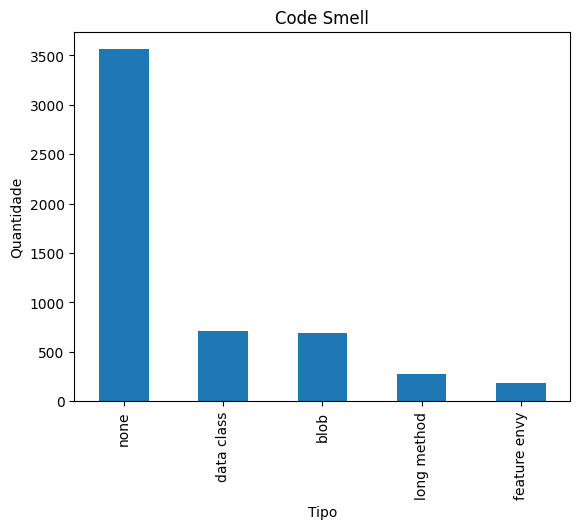

In [29]:
plt.xlabel("Tipo")
plt.ylabel("Quantidade")
plt.title("Code Smell")
dataset['smell'].value_counts().plot.bar() #;
plt.show()

## 2.3 removendo os atributos do CK que NAO serao avaliados

** ATENCAO** Para um primeiro teste, serao mantidos os abaixo:




In [30]:
manter = ['reviewer','severity','lines','num_commits','smell','type','relevant','review_timestamp'] + ['cboModified','fanin','fanout','wmc','rfc','loc',
          'returnsQty','loopQty','comparisonsQty','tryCatchQty',
          'parenthesizedExpsQty','stringLiteralsQty','numbersQty', 'assignmentsQty','mathOperationsQty','variablesQty', 
          'maxNestedBlocksQty','anonymousClassesQty', 'innerClassesQty','lambdasQty','uniqueWordsQty','modifiers',
          'logStatementsQty']

In [31]:
print(dataset.shape)
dataset = dataset[manter]
print(dataset.shape)


(5424, 79)
(5424, 31)


# 2.4 verificando outliers - desvio padrao - NAO FOI FEITO

**PRIMEIRO TESTE SEM FAZER**

In [32]:
dataset.describe()
dataset.shape

(5424, 31)

In [33]:
# NAO FOI FEITO



# colunas que terão desvio padrao verificado
#lista = dataset.describe()
print(dataset.shape)
lista = ['cboModified','fanin','fanout','wmc','rfc','loc','returnsQty','loopQty','comparisonsQty','tryCatchQty',
          'parenthesizedExpsQty','stringLiteralsQty','numbersQty', 'assignmentsQty','mathOperationsQty','variablesQty', 
          'maxNestedBlocksQty','anonymousClassesQty', 'innerClassesQty','lambdasQty','uniqueWordsQty','modifiers',
          'logStatementsQty']
for col in lista:
  dt_mean = np.mean(dataset[col])
  dt_std = np.std(dataset[col])
  cut_off = dt_std * 2
  lower = dt_mean - cut_off
  upper = dt_mean + cut_off
  quantidade_fica = dataset[( 
                    (dataset[col] > lower) &
                    (dataset[col] < upper))].shape[0]
  #print(f'Serao mantidos: {quantidade_fica} ')
  #print(f'{col}  removido {5424-quantidade_fica}')
  #dataset_test1 = pd.DataFrame()
  #dataset_test2 = pd.DataFrame()
  #dataset_test3 = pd.DataFrame()
  
  #dataset_test1 = dataset[(dataset[col] > lower)]
  #dataset_test2 = dataset[(dataset[col] < upper)]
  #dataset_test3 = pd.concat([dataset_test1,dataset_test2])

  dataset = dataset[( 
                    (dataset[col] > lower) &
                    (dataset[col] < upper))]

  #plt.xlabel("Tipo")
  #plt.ylabel("Quantidade")
  #plt.title("Code Smell")
  #dataset['smell'].value_counts().plot.bar() #;
  #plt.show()

  print(dataset.shape)

(5424, 31)
(5259, 31)
(5012, 31)
(4725, 31)
(4593, 31)
(4362, 31)
(4121, 31)
(3853, 31)
(3737, 31)
(3587, 31)
(3491, 31)
(3366, 31)
(3303, 31)
(3228, 31)
(3061, 31)
(2960, 31)
(2731, 31)
(2595, 31)
(2538, 31)
(2486, 31)
(2475, 31)
(2333, 31)
(2273, 31)
(2229, 31)


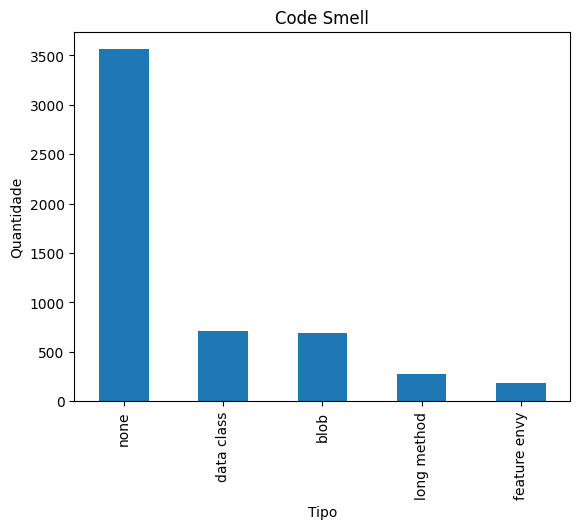

In [33]:
plt.xlabel("Tipo")
plt.ylabel("Quantidade")
plt.title("Code Smell")
dataset['smell'].value_counts().plot.bar() #;
plt.show()

# 3 Balancear a base

undersamplig

In [34]:
num_0 = len(dataset[dataset['smell']=='none'])
num_1 = len(dataset[dataset['smell']=='data class'])
num_2 = len(dataset[dataset['smell']=='blob'])
num_3 = len(dataset[dataset['smell']=='long method'])
num_4 = len(dataset[dataset['smell']=='feature envy'])
print(num_1+num_2+num_3+num_4)
#dataset = pd.concat([ dataset[dataset['smell']=='none'].sample(num_1+num_2+num_3+num_4) , dataset[dataset['smell'] !='none'] ])

quant = int(max(num_1,num_2,num_3,num_4) * 1.2)   # peguei 20% acima da maior quantidade
dataset = pd.concat([ dataset[dataset['smell']=='none'].sample(quant) , dataset[dataset['smell'] !='none'] ])

# tentativa com todos na mesma quantidade
#d1 = dataset[dataset['smell']=='none'].sample(num_4)
#d2 = dataset[dataset['smell']=='data class'].sample(num_4)
#d3 = dataset[dataset['smell']=='blob'].sample(num_4)
#d4 = dataset[dataset['smell']=='long method'].sample(num_4)
#d5 = dataset[dataset['smell']=='feature envy'].sample(num_4)
#dataset = pd.concat([d1,d2,d3,d4,d5])
dataset.reset_index(inplace=True)
dataset.shape


1862


(2720, 32)

In [35]:
dataset['smell'].value_counts()

none            858
data class      715
blob            686
long method     275
feature envy    186
Name: smell, dtype: int64

In [36]:
dataset['smell'].value_counts()

none            291
data class      243
long method     181
feature envy    136
blob             28
Name: smell, dtype: int64

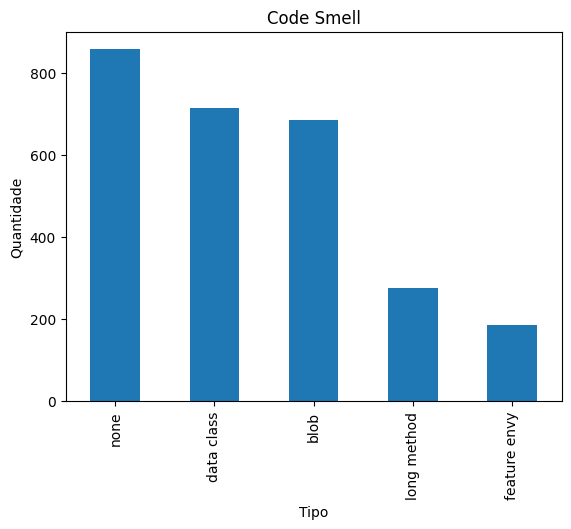

In [36]:
plt.xlabel("Tipo")
plt.ylabel("Quantidade")
plt.title("Code Smell")
dataset['smell'].value_counts().plot.bar() #;
plt.show()

In [38]:
###df = dataset

# 4 One hot enconding / Label Encoder

In [37]:
# Import LabelEncoder
from sklearn import preprocessing

## codificando severity

In [38]:
modelo_severity = preprocessing.LabelEncoder()
modelo_severity.fit(sorted(dataset['severity'].unique()))
dataset['cod_severity'] = modelo_severity.fit_transform(dataset.severity)

In [39]:
sorted(dataset['severity'].unique())

['critical', 'major', 'minor', 'none']

In [40]:
sorted(dataset['cod_severity'].unique())

[0, 1, 2, 3]

In [41]:
dataset.drop(columns='severity',inplace = True)

###  codificando relevant

In [42]:
# Import LabelEncoder
from sklearn import preprocessing

In [43]:
modelo_relevant = preprocessing.LabelEncoder()
modelo_relevant.fit(sorted(dataset['relevant'].unique()))
dataset['cod_relevant'] = modelo_relevant.fit_transform(dataset.relevant)

In [44]:
dataset.drop(columns='relevant',inplace = True)

### Codificando o label

In [45]:
sorted(dataset['smell'].unique())

['blob', 'data class', 'feature envy', 'long method', 'none']

In [46]:
modelo_label = preprocessing.LabelEncoder()
modelo_label.fit(sorted(dataset['smell'].unique()))
dataset['label'] = modelo_label.fit_transform(dataset.smell)
sorted(dataset['label'].unique())

[0, 1, 2, 3, 4]

In [47]:
dataset.drop(columns='smell',inplace = True)

### Codificando type

In [48]:
dataset.columns

Index(['index', 'reviewer', 'lines', 'num_commits', 'type', 'review_timestamp',
       'cboModified', 'fanin', 'fanout', 'wmc', 'rfc', 'loc', 'returnsQty',
       'loopQty', 'comparisonsQty', 'tryCatchQty', 'parenthesizedExpsQty',
       'stringLiteralsQty', 'numbersQty', 'assignmentsQty',
       'mathOperationsQty', 'variablesQty', 'maxNestedBlocksQty',
       'anonymousClassesQty', 'innerClassesQty', 'lambdasQty',
       'uniqueWordsQty', 'modifiers', 'logStatementsQty', 'cod_severity',
       'cod_relevant', 'label'],
      dtype='object')

In [49]:
#dataset['type'].value_counts()
print(sorted(dataset['type'].unique()))
modelo_type = preprocessing.LabelEncoder()
modelo_type.fit(sorted(dataset['type'].unique()))
dataset['cod_type'] = modelo_type.fit_transform(dataset.type)
sorted(dataset['cod_type'].unique())

['class', 'function']


[0, 1]

In [50]:
dataset.drop(columns='type',inplace = True)

### Criada a coluna cod_hora

In [51]:
# criada coluna hora, onde tem HH do review_timestamp
func_hora = lambda x: x.split(" ", 1)[1].split(":",1)[0]
dataset['hora'] = dataset.review_timestamp.apply(func_hora)
dataset['hora'] = dataset['hora'].astype(int)

In [52]:
# criada coluna para codificar a hora, sendo 1 para fora do horário regular e 
# 0 para horário regular 
dataset['cod_hora'] = 0
dataset['cod_hora'] = np.where(dataset['hora'] >= 18, 1,0)
dataset['cod_hora'] = np.where(dataset['hora'] <=  8, 1,0)

In [53]:
dataset['cod_hora'].value_counts()

0    2361
1     359
Name: cod_hora, dtype: int64

In [54]:
dataset.drop(columns='review_timestamp',inplace = True)

## Codificando o reviewer

In [55]:
dataset['reviewer'].value_counts()

Middle     1159
Junior      736
Senior      694
unknown     131
Name: reviewer, dtype: int64

In [56]:
modelo_reviewer = preprocessing.LabelEncoder()
modelo_reviewer.fit(sorted(dataset['reviewer'].unique()))
dataset['cod_reviewer'] = modelo_reviewer.fit_transform(dataset.reviewer)

In [57]:
dataset['cod_reviewer'].value_counts()

1    1159
0     736
2     694
3     131
Name: cod_reviewer, dtype: int64

#** a partir daqui trabalharei com a variavel df e nao mais dataset**

dataset ficou congelado para seguir também para a avaliacao do dataset estendido



In [58]:
df = dataset

# 5 - Funcoes auxiliares

In [172]:
## Plota a matriz de confusão
def matriz_confusao(y_pred, y_test,classes):
    confMatrix = confusion_matrix(y_pred, y_test)

    ax = plt.subplot()
    sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap='twilight', linewidths=1, linecolor='black')
    plt.xlabel('Real')
    plt.ylabel('Predict')
    plt.title('Confusion Matrix')

    # Colocar os nomes
    ax.xaxis.set_ticklabels(classes)
    ax.yaxis.set_ticklabels(classes)
    plt.show()

In [60]:
from sklearn.metrics import accuracy_score, cohen_kappa_score
def print_indicadores(y_pred, y_test):
    print()
    print(f"Acurácia:\t{accuracy_score(y_pred, y_test):.2f}")
    print(f"Kappa:\t\t{cohen_kappa_score(y_pred, y_test):.2f}", )
    print()

# 6 Aplicando os modelos no MLCQ

In [61]:
## Mantendo somente os atributos do MLCQ
## mantendo somente as linhas que tiveram match com o organic para que futura comparação seja feita com os mesmos dados 
## df_MLCQ = df[['label','reviewer_id','cod_severity','review_timestamp','lines','cod_relevant']] # + newcolumns]

## severity nao foi incluido
#df = df[['reviewer_id','start_line','end_line','lines','num_commits','label','cod_relevant', 'cod_hora']]
df = df[['cod_reviewer','cod_severity','lines','num_commits','label','cod_relevant', 'cod_hora']]

print(df.shape)
df.sample(10)

(2720, 7)


,cod_reviewer,cod_severity,lines,num_commits,label,cod_relevant,cod_hora
790,1,3,1918,76,4,2,0
824,2,3,392,170,4,2,0
2240,2,1,100,319,1,2,0
46,1,3,6,34,4,1,1
341,0,3,66,192,4,2,0
1492,1,2,182,78,0,2,0
1838,1,2,96,162,3,2,0
1892,1,2,100,32,0,2,0
97,1,3,3,170,4,2,1
711,0,3,14,128,4,2,1


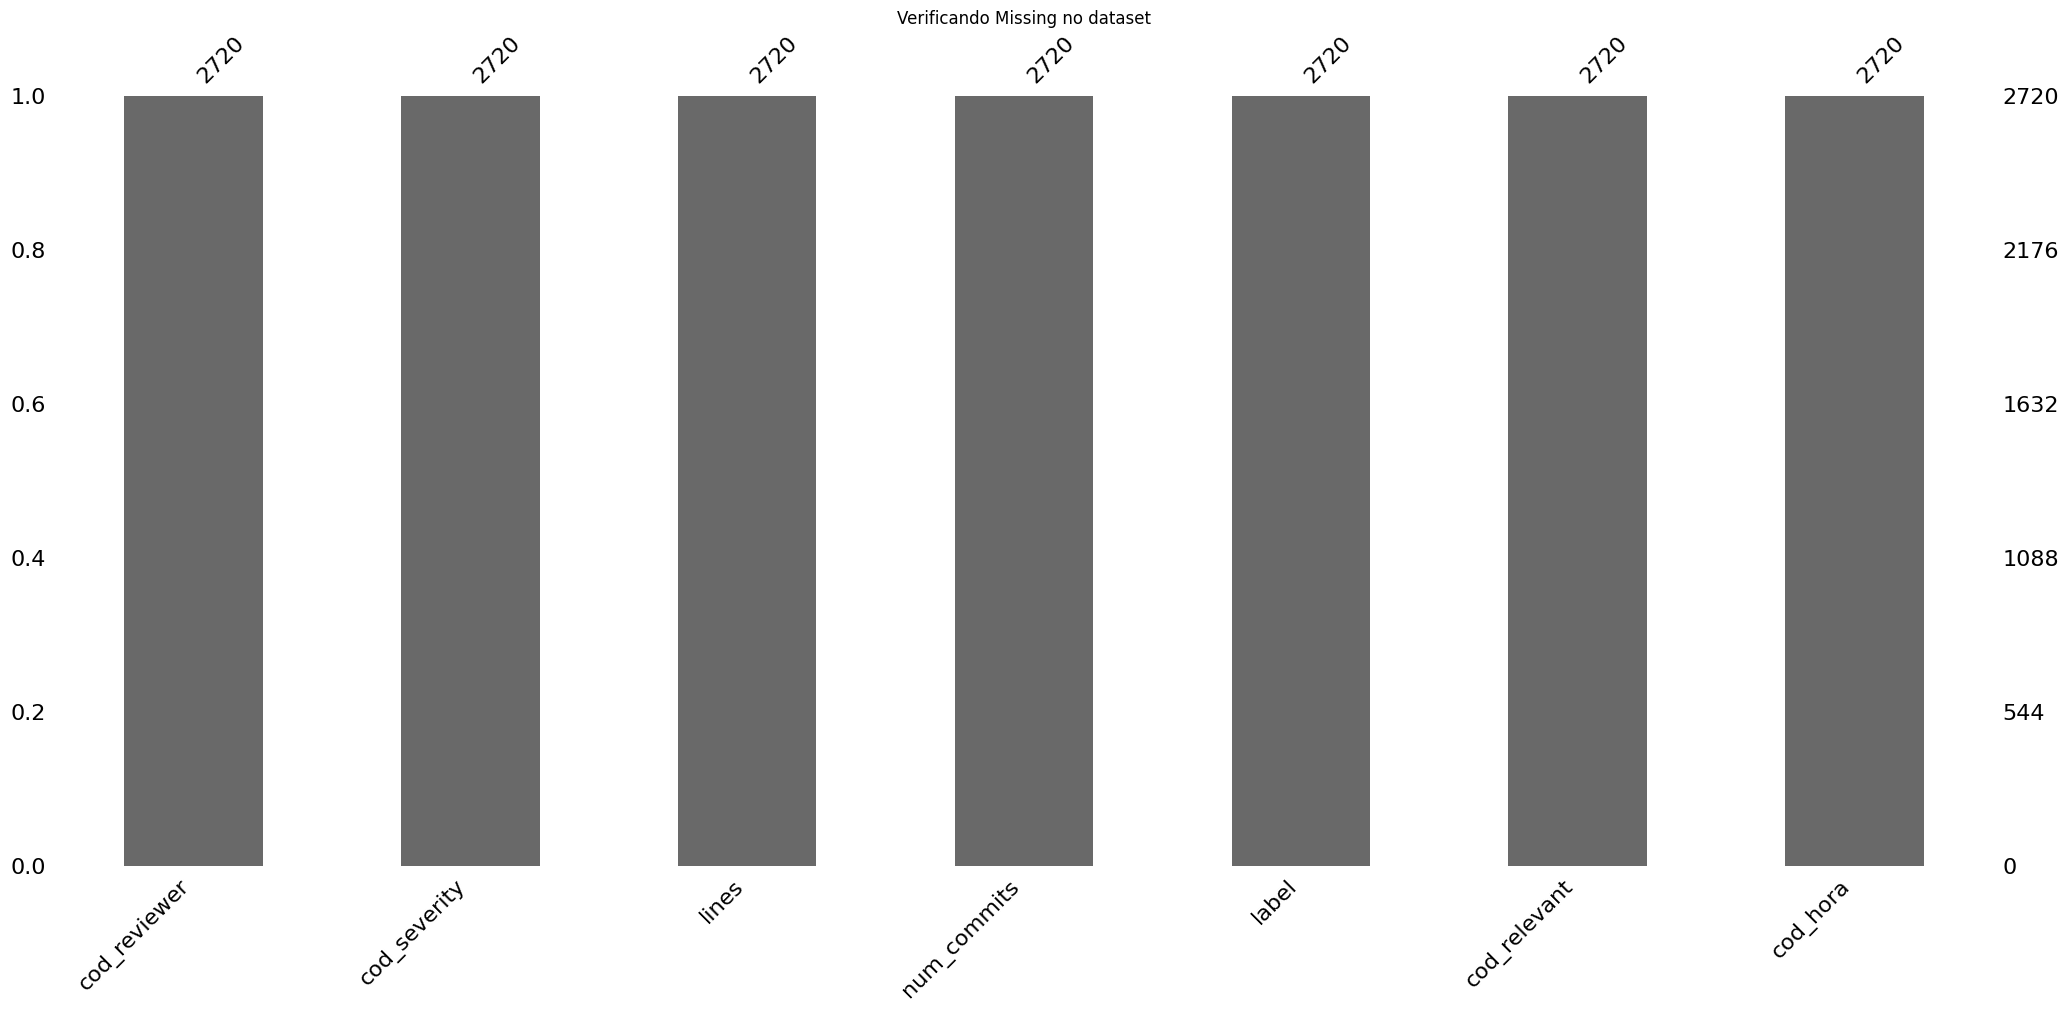

In [62]:
# olhando se ficou algum missing # start line e end line com nan nao representa problema.
import missingno
plt.title("Verificando Missing no dataset")
missingno.bar(df)
plt.savefig("Base Limpa - Missing.svg")
plt.show()

In [63]:
# ainda sem conjunto de validacao
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'label'], 
                                                    df['label'], test_size=0.2, 
                                                    stratify=df.label)

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2176, 6)
(544, 6)
(2176,)
(544,)


In [65]:
# Scaling the Train and Test feature set 
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## A) - KNN com gridsearch



In [66]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [67]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors': [3,5,7,11,15,19],
    'weights' : ['uniform','distance'],
    'metric'  : ['euclidean','manhattan']
}

In [68]:
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1, cv = 3, n_jobs = -1)

In [69]:
knn = gs.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [70]:
## imprimindo informacoes do fit
print(f'Melhor modelo:  {knn.best_score_}')
print(f'Hiperparametros:{knn.best_params_}')
print(f'Estimators:     {knn.best_estimator_}')
print(f'Id:             {knn.best_index_}')

Melhor modelo:  0.6392387828124505
Hiperparametros:{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Estimators:     KNeighborsClassifier(metric='manhattan', n_neighbors=19)
Id:             22


In [71]:
final_model = knn.best_estimator_

In [72]:
y_test_predicted_knn = final_model.predict(x_test_scaled)
y_test_predicted_knn_indexes = y_test_predicted_knn
y_test_indexes = y_test.values

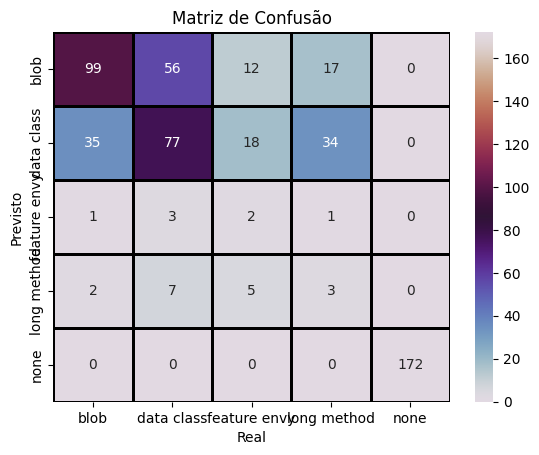

In [73]:
matriz_confusao(y_test_predicted_knn_indexes, y_test_indexes,list(modelo_label.inverse_transform([0,1,2,3,4])))

In [74]:
print_indicadores(y_test_predicted_knn_indexes, y_test_indexes)


Acurácia:	0.65
Kappa:		0.52



## B)  RF com grid search

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
grid_params = {
    'min_samples_leaf': [15,20,23,25,27,30]
}

In [76]:
gs = GridSearchCV(RandomForestClassifier(random_state=seed),grid_params,verbose = 1, cv = 3, n_jobs = -1)

In [77]:
RF = gs.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [78]:
final_model = RF.best_estimator_

In [79]:
## imprimindo informacoes do fit
print(f'Melhor modelo:  {RF.best_score_}')
print(f'Hiperparametros:{RF.best_params_}')
print(f'Estimators:     {RF.best_estimator_}')
print(f'Id:             {RF.best_index_}')

Melhor modelo:  0.7265577404135396
Hiperparametros:{'min_samples_leaf': 15}
Estimators:     RandomForestClassifier(min_samples_leaf=15, random_state=10)
Id:             0


In [80]:
# Previsão
# aplicando o modelo na base de teste
y_test_predicted_RF = final_model.predict(x_test)
y_test_predicted_RF_indexes = y_test_predicted_RF
y_test_indexes = y_test.values

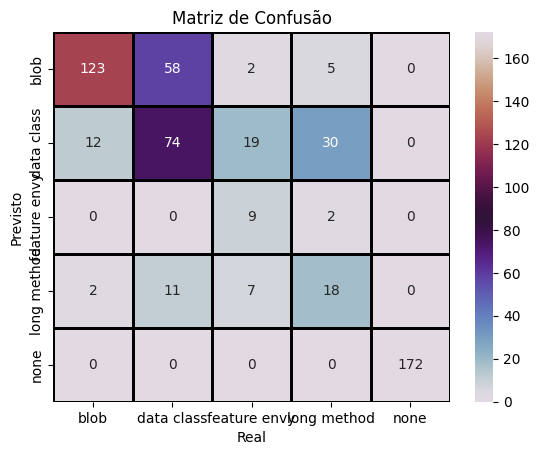

In [81]:
matriz_confusao(y_test_predicted_RF_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1, 2, 3, 4])))

In [82]:
print_indicadores(y_test_predicted_RF_indexes, y_test_indexes)


Acurácia:	0.73
Kappa:		0.63



## C)  Melhorando o RF

In [83]:
# Remove as features que não foram consideradas importantes no modelo
feature_imp = zip(df.columns.values, RF.best_estimator_.feature_importances_)
features = [val[0] for val in list(feature_imp) if val[1] > 0.1]
features

['cod_severity', 'lines']

In [84]:
features.append('label')

In [85]:
df_cleanRF = df[features]
df_cleanRF.head()


,cod_severity,lines,label
0,3,190,4
1,3,3,4
2,3,868,4
3,3,5,4
4,3,25,4


In [86]:
x_trainRF, x_testRF, y_trainRF, y_testRF = train_test_split(df_cleanRF.loc[:,df_cleanRF.columns != 'label'], 
                                                    df_cleanRF['label'], test_size=0.2, 
                                                    stratify=df_cleanRF.label)

In [87]:
print(x_trainRF.shape)
print(x_testRF.shape)
print(y_trainRF.shape)
print(y_testRF.shape)

(2176, 2)
(544, 2)
(2176,)
(544,)


In [88]:
RF_clean_model = gs.fit(x_trainRF, y_trainRF)
#b

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [89]:
final_model = RF_clean_model.best_estimator_
#c

In [90]:
## imprimindo informacoes do fit
print(f'Melhor modelo:  {RF.best_score_}')
print(f'Hiperparametros:{RF.best_params_}')
print(f'Estimators:     {RF.best_estimator_}')
print(f'Id:             {RF.best_index_}')

Melhor modelo:  0.7146125835154048
Hiperparametros:{'min_samples_leaf': 27}
Estimators:     RandomForestClassifier(min_samples_leaf=27, random_state=10)
Id:             4


In [91]:
# Previsão
# aplicando o modelo na base de teste
y_test_predicted_RF = final_model.predict(x_testRF)
y_test_predicted_RF_indexes = y_test_predicted_RF
y_test_indexes = y_testRF.values

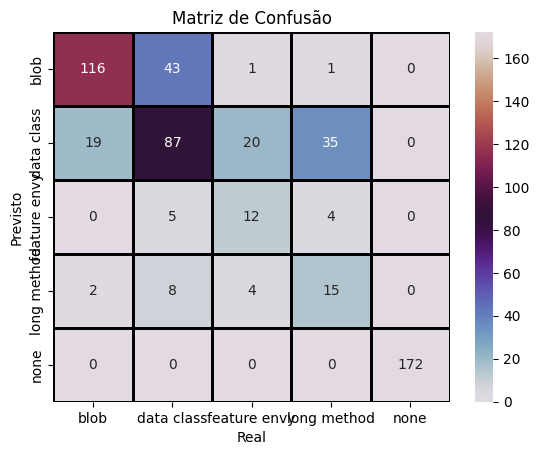

In [92]:
matriz_confusao(y_test_predicted_RF_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1, 2, 3, 4])))

In [93]:
print_indicadores(y_test_predicted_RF_indexes, y_test_indexes)


Acurácia:	0.74
Kappa:		0.65



## D) Regressao Logistica

In [94]:
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

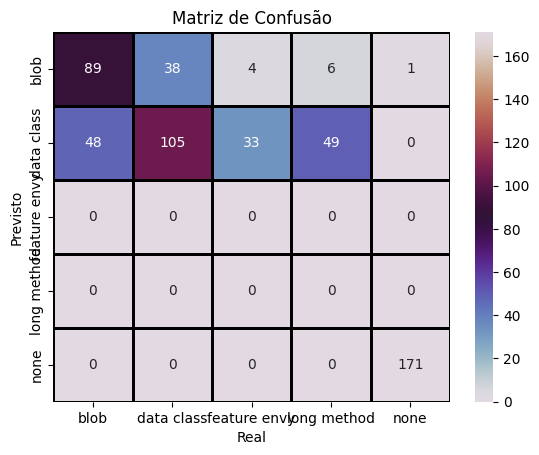


Acurácia:	0.67
Kappa:		0.54



In [95]:
from sklearn.linear_model import LogisticRegression
random_state = 10

LR = LogisticRegression(random_state=random_state)
LR.fit(x_train_scaled, y_train)

y_test_predicted_LR = LR.predict(x_test_scaled)
y_test_predicted_LR_indexes = y_test_predicted_LR
y_test_indexes = y_test.values


matriz_confusao(y_test_predicted_LR_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1, 2, 3, 4])))
print_indicadores(y_test_predicted_LR_indexes, y_test)

## E) SVM - Classificacao - Com Grid Search

In [96]:
from sklearn.svm import SVC


In [97]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [10, 100, 1000]},
               {'kernel': ['linear'], 'C': [10, 100, 1000]}]

In [98]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [10, 100, 1000], 'kernel': ['linear']}])

In [99]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best score for training data: 0.6603859538120849 

Best C: 1000 

Best Kernel: linear 

Best Gamma: scale 



In [100]:
final_model = svm_model.best_estimator_

In [101]:
y_test_predicted_knn = final_model.predict(x_test_scaled)
y_test_predicted_knn_indexes = y_test_predicted_knn
y_test_indexes = y_test.values

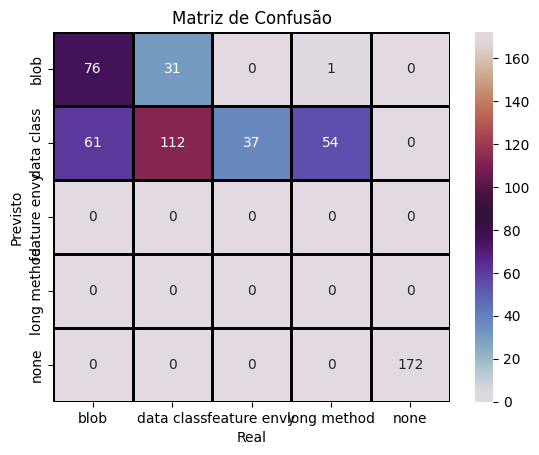


Acurácia:	0.66
Kappa:		0.53



In [102]:
matriz_confusao(y_test_predicted_knn_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1,2,3,4])))
print_indicadores(y_test_predicted_knn_indexes, y_test)

# 7 Aplicando os modelos ao MLCQ estendido com CK

## 7.1 Conferindo o dataset

In [103]:
df = dataset

In [104]:
df.columns

Index(['index', 'reviewer', 'lines', 'num_commits', 'cboModified', 'fanin',
       'fanout', 'wmc', 'rfc', 'loc', 'returnsQty', 'loopQty',
       'comparisonsQty', 'tryCatchQty', 'parenthesizedExpsQty',
       'stringLiteralsQty', 'numbersQty', 'assignmentsQty',
       'mathOperationsQty', 'variablesQty', 'maxNestedBlocksQty',
       'anonymousClassesQty', 'innerClassesQty', 'lambdasQty',
       'uniqueWordsQty', 'modifiers', 'logStatementsQty', 'cod_severity',
       'cod_relevant', 'label', 'cod_type', 'hora', 'cod_hora',
       'cod_reviewer'],
      dtype='object')

In [105]:
df.shape

(2720, 34)

**1 atributos que serão removidos, pois nao contribuem:**


remover = ['file','class','synchronizedFieldsQty','method','constructor','line','hasJavaDoc','clean_method','_merge','hora'

In [ ]:
#remover = ['file','class','synchronizedFieldsQty','method','constructor','line','hasJavaDoc','clean_method','_merge','hora','type_ck','link']
#df = df.drop(columns = remover)
#df.shape

** 2) Atributos que serão removidos por alta quantidade de nan**


remover por nan: ['dit','noc','lcom']

In [ ]:
#remover = ['dit','noc','lcom']
#df = df.drop(columns = remover)
#df.shape


remover os 3 atributos que tem nan:
lcom*: 20
tcc: 257
lcc: 257


In [ ]:
#remover = ['lcom*','tcc','lcc']
#df = df.drop(columns = remover)
#df.shape


** 3 - atributos que podem ser mantidos substituindo nan por 0

Sao atributos de Methods que nao se aplicam para classes

'totalMethodsQty','staticMethodsQty','publicMethodsQty','privateMethodsQty','protectedMethodsQty','defaultMethodsQty','visibleMethodsQty',
                     'abstractMethodsQty','finalMethodsQty','synchronizedMethodsQty','totalFieldsQty','staticFieldsQty',
                     'publicFieldsQty','privateFieldsQty','protectedFieldsQty','defaultFieldsQty','finalFieldsQty','nosi','parametersQty', 'methodsInvokedQty',
                     'methodsInvokedLocalQty','methodsInvokedIndirectLocalQty'


**Neste primeiro teste serao removidos**

In [ ]:
#remover = ['totalMethodsQty','staticMethodsQty','publicMethodsQty','privateMethodsQty','protectedMethodsQty','defaultMethodsQty','visibleMethodsQty', 'abstractMethodsQty','finalMethodsQty','synchronizedMethodsQty','totalFieldsQty','staticFieldsQty', 'publicFieldsQty','privateFieldsQty','protectedFieldsQty','defaultFieldsQty','finalFieldsQty','nosi','parametersQty', 'methodsInvokedQty', 'methodsInvokedLocalQty','methodsInvokedIndirectLocalQty']
#df = df.drop(columns = remover)
#df.shape

** 4 - Atributos que devem ser mantidos**

manter = ['cob','cboModified','fanin','fanout','wmc','rfc','loc','returnsQty','loopQty','comparisonsQty','tryCatchQty',
          'parenthesizedExpsQty','stringLiteralsQty','numbersQty', 'assignmentsQty','mathOperationsQty','variablesQty', 
          'maxNestedBlocksQty','anonymousClassesQty', 'innerClassesQty','lambdasQty','uniqueWordsQty','modifiers',
          'logStatementsQty']

** 5 - Atributos do MLCQ que devem ser removidos

commit_hash,sample_id, smell, severity,review_timestamp, code_name repository, path, relevant, type_ck, 

In [106]:
##Quantidade de NAN
for col in df.columns:
    cont = df[col].isna().sum()
    print(f'{col}: {cont} ')

index: 0 
reviewer: 0 
lines: 0 
num_commits: 0 
cboModified: 0 
fanin: 0 
fanout: 0 
wmc: 0 
rfc: 0 
loc: 0 
returnsQty: 0 
loopQty: 0 
comparisonsQty: 0 
tryCatchQty: 0 
parenthesizedExpsQty: 0 
stringLiteralsQty: 0 
numbersQty: 0 
assignmentsQty: 0 
mathOperationsQty: 0 
variablesQty: 0 
maxNestedBlocksQty: 0 
anonymousClassesQty: 0 
innerClassesQty: 0 
lambdasQty: 0 
uniqueWordsQty: 0 
modifiers: 0 
logStatementsQty: 0 
cod_severity: 0 
cod_relevant: 0 
label: 0 
cod_type: 0 
hora: 0 
cod_hora: 0 
cod_reviewer: 0 


In [107]:
df.drop(columns='reviewer',inplace=True)
df.drop(columns='index',inplace=True)
df.drop(columns='hora',inplace=True)



In [108]:
##Quantidade de 'none' que tinha
for col in df.columns:
    cont = (df[col]=='NONE').sum()
    print(f'{col}: {cont} ')

lines: 0 
num_commits: 0 
cboModified: 0 
fanin: 0 
fanout: 0 
wmc: 0 
rfc: 0 
loc: 0 
returnsQty: 0 
loopQty: 0 
comparisonsQty: 0 
tryCatchQty: 0 
parenthesizedExpsQty: 0 
stringLiteralsQty: 0 
numbersQty: 0 
assignmentsQty: 0 
mathOperationsQty: 0 
variablesQty: 0 
maxNestedBlocksQty: 0 
anonymousClassesQty: 0 
innerClassesQty: 0 
lambdasQty: 0 
uniqueWordsQty: 0 
modifiers: 0 
logStatementsQty: 0 
cod_severity: 0 
cod_relevant: 0 
label: 0 
cod_type: 0 
cod_hora: 0 
cod_reviewer: 0 


In [109]:
# confirmando que todas as colunas sao numericas
print(len(df.describe().columns))
print(len(df.columns))

31
31


## 7.2 Dividindo treinamento/teste

In [110]:
# ainda sem conjunto de validacao
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'label'], 
                                                    df['label'], test_size=0.2, 
                                                    stratify=df.label)


In [111]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2176, 30)
(544, 30)
(2176,)
(544,)


In [112]:
# Scaling the Train and Test feature set 
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## A) - KNN com gridsearch

In [113]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [114]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors': [25,28,30,32,35,38,40],
    'weights' : ['uniform','distance'],
    'metric'  : ['euclidean','manhattan']
}

In [115]:
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1, cv = 3, n_jobs = -1)


In [116]:
knn = gs.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


In [117]:
## imprimindo informacoes do fit
print(f'Melhor modelo:  {knn.best_score_}')
print(f'Hiperparametros:{knn.best_params_}')
print(f'Estimators:     {knn.best_estimator_}')
print(f'Id:             {knn.best_index_}')


Melhor modelo:  0.793197808809094
Hiperparametros:{'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'uniform'}
Estimators:     KNeighborsClassifier(metric='manhattan', n_neighbors=25)
Id:             14


In [118]:
final_model = knn.best_estimator_

In [119]:
y_test_predicted_knn = final_model.predict(x_test_scaled)
y_test_predicted_knn_indexes = y_test_predicted_knn
y_test_indexes = y_test.values

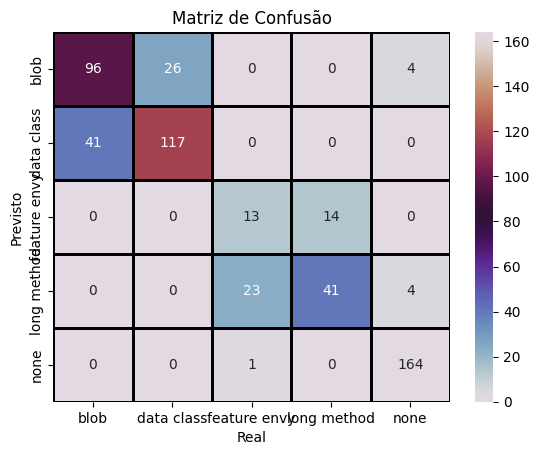

In [120]:
matriz_confusao(y_test_predicted_knn_indexes, y_test_indexes,list(modelo_label.inverse_transform([0,1,2,3,4])))


In [121]:
print_indicadores(y_test_predicted_knn_indexes, y_test_indexes)


Acurácia:	0.79
Kappa:		0.72



## B)  RF com grid search

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
grid_params = {
    'min_samples_leaf': [10,15,20,25]
}

In [123]:
gs = GridSearchCV(RandomForestClassifier(random_state=seed),grid_params,verbose = 1, cv = 3, n_jobs = -1)

In [124]:
RF = gs.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [125]:
## imprimindo informacoes do fit
print(f'Melhor modelo:  {RF.best_score_}')
print(f'Hiperparametros:{RF.best_params_}')
print(f'Estimators:     {RF.best_estimator_}')
print(f'Id:             {RF.best_index_}')

Melhor modelo:  0.8235255375067286
Hiperparametros:{'min_samples_leaf': 10}
Estimators:     RandomForestClassifier(min_samples_leaf=10, random_state=10)
Id:             0


In [126]:
final_model = RF.best_estimator_

In [127]:
# Predição
# aplicando o modelo na base de teste
y_test_predicted_RF = final_model.predict(x_test)
y_test_predicted_RF_indexes = y_test_predicted_RF
y_test_indexes = y_test.values

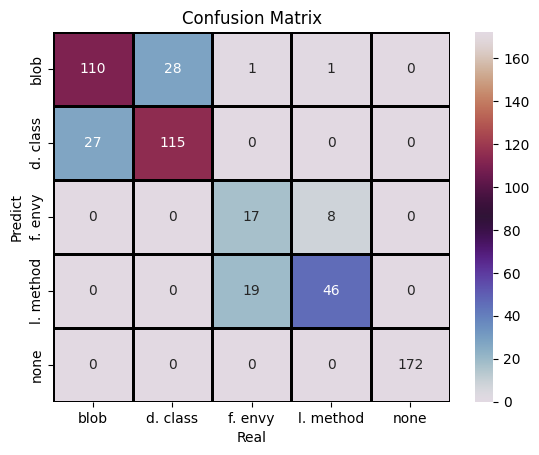

In [173]:
# VERSAO PARA O ARTIGO
#lista = list(modelo_label.inverse_transform([0, 1, 2, 3, 4]))
lista = ['blob', 'd. class', 'f. envy', 'l. method', 'none']
matriz_confusao(y_test_predicted_RF_indexes, y_test_indexes,lista)

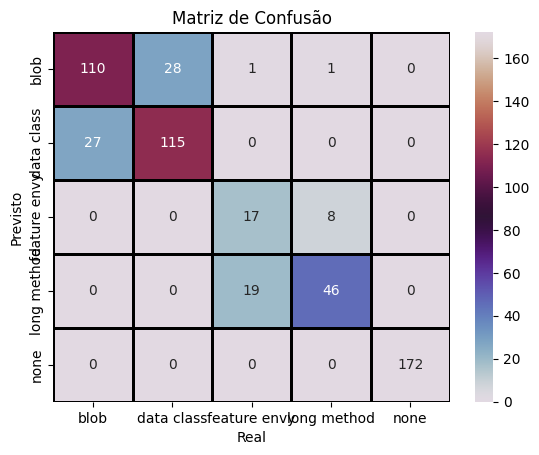

In [128]:
matriz_confusao(y_test_predicted_RF_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1, 2, 3, 4])))

In [129]:
print_indicadores(y_test_predicted_RF_indexes, y_test_indexes)


Acurácia:	0.85
Kappa:		0.79



## D) Regressao Logistica

In [130]:
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression
random_state = 10

In [131]:
LR = LogisticRegression(random_state=random_state)
LR.fit(x_train_scaled, y_train)

LogisticRegression(random_state=10)

In [132]:
y_test_predicted_LR = LR.predict(x_test_scaled)
y_test_predicted_LR_indexes = y_test_predicted_LR
y_test_indexes = y_test.values

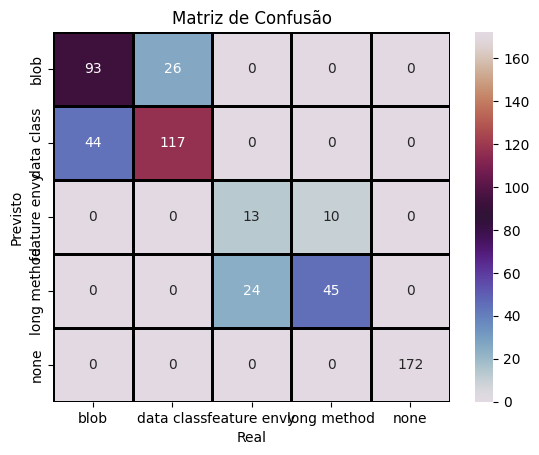

In [133]:
matriz_confusao(y_test_predicted_LR_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1, 2, 3, 4])))

In [134]:
print_indicadores(y_test_predicted_LR_indexes, y_test)




Acurácia:	0.81
Kappa:		0.75



## E) SVM - Classificacao - Com Grid Search

In [135]:
from sklearn.svm import SVC

In [136]:

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [100, 1000,1200,1300]},
                    {'kernel': ['linear'], 'C': [1000, 1200, 1500, 2000]}]


In [137]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [100, 1000, 1200, 1300],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [1000, 1200, 1500, 2000], 'kernel': ['linear']}])

In [138]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 


Best score for training data: 0.8051418327533482 



In [139]:
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")


Best C: 1000 

Best Kernel: linear 

Best Gamma: scale 



In [140]:
final_model = svm_model.best_estimator_

In [141]:
y_test_predicted_knn = final_model.predict(x_test_scaled)
y_test_predicted_knn_indexes = y_test_predicted_knn
y_test_indexes = y_test.values

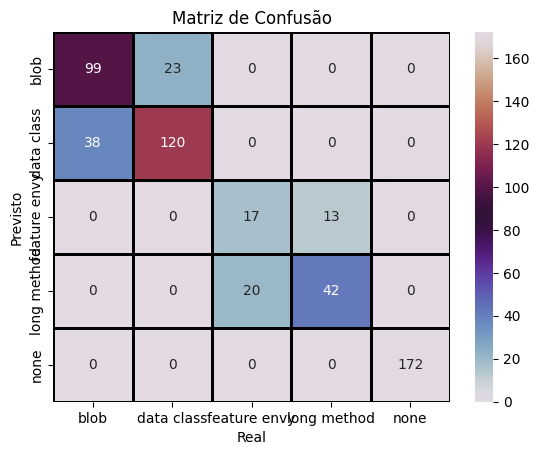


Acurácia:	0.83
Kappa:		0.77



In [142]:
matriz_confusao(y_test_predicted_knn_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1,2,3,4])))
print_indicadores(y_test_predicted_knn_indexes, y_test)

# 8 Redefinicao dos atributos do CK
NAO FOI TERMINADO


In [155]:
df = dataset
df.shape

(2720, 31)

In [156]:
df.columns

Index(['lines', 'num_commits', 'cboModified', 'fanin', 'fanout', 'wmc', 'rfc',
       'loc', 'returnsQty', 'loopQty', 'comparisonsQty', 'tryCatchQty',
       'parenthesizedExpsQty', 'stringLiteralsQty', 'numbersQty',
       'assignmentsQty', 'mathOperationsQty', 'variablesQty',
       'maxNestedBlocksQty', 'anonymousClassesQty', 'innerClassesQty',
       'lambdasQty', 'uniqueWordsQty', 'modifiers', 'logStatementsQty',
       'cod_severity', 'cod_relevant', 'label', 'cod_type', 'cod_hora',
       'cod_reviewer'],
      dtype='object')

## 8.1 - Retirando outliers

In [157]:
# colunas que terão desvio padrao verificado
#lista = dataset.describe()
print(dataset.shape)
lista = ['cboModified','fanin','fanout','wmc','rfc','loc','returnsQty','loopQty','comparisonsQty','tryCatchQty',
          'parenthesizedExpsQty','stringLiteralsQty','numbersQty', 'assignmentsQty','mathOperationsQty','variablesQty', 
          'maxNestedBlocksQty','anonymousClassesQty', 'innerClassesQty','lambdasQty','uniqueWordsQty','modifiers',
          'logStatementsQty']
for col in lista:
  dt_mean = np.mean(dataset[col])
  dt_std = np.std(dataset[col])
  cut_off = dt_std * 2
  lower = dt_mean - cut_off
  upper = dt_mean + cut_off
  quantidade_fica = dataset[( 
                    (dataset[col] > lower) &
                    (dataset[col] < upper))].shape[0]
  print(f'{col}  removido {5424-quantidade_fica}')
  #dataset = dataset[( 
  #                  (dataset[col] > lower) &
  #                  (dataset[col] < upper))]

print(dataset.shape)

(2720, 31)
cboModified  removido 2782
fanin  removido 2760
fanout  removido 2796
wmc  removido 2804
rfc  removido 2816
loc  removido 2785
returnsQty  removido 2775
loopQty  removido 2773
comparisonsQty  removido 2790
tryCatchQty  removido 2745
parenthesizedExpsQty  removido 2782
stringLiteralsQty  removido 2736
numbersQty  removido 2762
assignmentsQty  removido 2787
mathOperationsQty  removido 2760
variablesQty  removido 2793
maxNestedBlocksQty  removido 2862
anonymousClassesQty  removido 2748
innerClassesQty  removido 2821
lambdasQty  removido 2752
uniqueWordsQty  removido 2844
modifiers  removido 2825
logStatementsQty  removido 2792
(2720, 31)


In [ ]:
## vai dar erro, ignorar, já foi previamente removido

#** mantendo do MLCQ os seguintes atributos:
##['reviewer_id','lines','num_commits','label','cod_relevant', 'cod_hora']]

#** atributos do MLCQ que serão removidos, pois nao contribuem:**
print(df.shape)
remover = ['commit_hash','sample_id','smell','severity','review_timestamp','type','code_name','repository','path','start_line','end_line','relevant']
df = df.drop(columns = remover)
df.shape

In [ ]:
#** atributos do CK que serão removidos, pois nao contribuem:**
#print(df.shape)
#remover = ['file','class','synchronizedFieldsQty','method','constructor','line','hasJavaDoc','clean_method','_merge','hora','type_ck','link']
#df = df.drop(columns = remover)
#df.shape
#ja tinham sido retirado

In [158]:
df.columns


Index(['lines', 'num_commits', 'cboModified', 'fanin', 'fanout', 'wmc', 'rfc',
       'loc', 'returnsQty', 'loopQty', 'comparisonsQty', 'tryCatchQty',
       'parenthesizedExpsQty', 'stringLiteralsQty', 'numbersQty',
       'assignmentsQty', 'mathOperationsQty', 'variablesQty',
       'maxNestedBlocksQty', 'anonymousClassesQty', 'innerClassesQty',
       'lambdasQty', 'uniqueWordsQty', 'modifiers', 'logStatementsQty',
       'cod_severity', 'cod_relevant', 'label', 'cod_type', 'cod_hora',
       'cod_reviewer'],
      dtype='object')

## 4.1 Os atributos serao os do MLCQ mais os seguintes do CK

manter = ['cob','cboModified','fanin','fanout','wmc','rfc','loc','returnsQty','loopQty','comparisonsQty','tryCatchQty',
          'parenthesizedExpsQty','stringLiteralsQty','numbersQty', 'assignmentsQty','mathOperationsQty','variablesQty', 
          'maxNestedBlocksQty','anonymousClassesQty', 'innerClassesQty','lambdasQty','uniqueWordsQty','modifiers',
          'logStatementsQty']

In [159]:
# alterei de reviewer_id para cod_reviewer

manter = ['cod_reviewer','lines','num_commits','label','cod_relevant', 'cod_hora'] + ['cboModified','fanin','fanout','wmc','rfc','loc','returnsQty','loopQty','comparisonsQty','tryCatchQty',
          'parenthesizedExpsQty','stringLiteralsQty','numbersQty', 'assignmentsQty','mathOperationsQty','variablesQty', 
          'maxNestedBlocksQty','anonymousClassesQty', 'innerClassesQty','lambdasQty','uniqueWordsQty','modifiers',
          'logStatementsQty']

In [160]:
print(df.shape)
df = df[manter]
print(df.shape)

(2720, 31)
(2720, 29)


In [161]:
df[manter]

,cod_reviewer,lines,num_commits,label,cod_relevant,cod_hora,cboModified,fanin,fanout,wmc,...,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty
0,2,190,30,4,2,0,117.0,102.0,15.0,32.0,...,12.0,1.0,14.0,1.0,0.0,0.0,2.0,74.0,17.0,0.0
1,0,3,31,4,2,0,14.0,0.0,14.0,10.0,...,29.0,2.0,0.0,2.0,0.0,0.0,0.0,45.0,4.0,0.0
2,1,868,184,4,2,0,118.0,2.0,116.0,6.0,...,63.0,1.0,176.0,2.0,1.0,1.0,0.0,286.0,1.0,0.0
3,0,5,58,4,2,0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0
4,2,25,76,4,2,1,1.0,1.0,0.0,5.0,...,7.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,2,1171,192,0,2,1,101.0,3.0,98.0,181.0,...,238.0,35.0,226.0,8.0,3.0,2.0,0.0,395.0,1025.0,39.0
2716,2,71,92,1,2,1,7.0,5.0,2.0,11.0,...,4.0,1.0,2.0,1.0,0.0,0.0,0.0,39.0,1025.0,0.0
2717,2,244,82,0,2,1,19.0,2.0,17.0,39.0,...,27.0,2.0,25.0,4.0,0.0,1.0,0.0,82.0,1.0,1.0
2718,2,25,319,1,2,1,3.0,2.0,1.0,3.0,...,8.0,0.0,3.0,0.0,0.0,1.0,0.0,26.0,1.0,0.0
